## Import all related libraries

In [8]:
import Bio
import pylab
import urllib
import pandas as pd
import nglview as nv
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
# from Bio.Alphabet import IUPAC
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import GC,molecular_weight
# from Bio.Alphabet import generic_dna,generic_rna,generic_protein

## read fasta file

In [9]:
virus_seq_file=SeqIO.read("../Biopython/virus_seq/corona_genomic_data_1_29903_KR.txt","fasta")

In [10]:
virus_seq_file

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MT039890.1', name='MT039890.1', description='MT039890.1 Severe acute respiratory syndrome coronavirus 2 isolate SNU01, complete genome', dbxrefs=[])

In [11]:
type(virus_seq_file)

Bio.SeqRecord.SeqRecord

In [12]:
virus_seq_file.id

'MT039890.1'

## print sequence only in fasta

In [13]:
seq_only=virus_seq_file.seq

In [14]:
seq_only

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [15]:
for record in SeqIO.parse("../Biopython/virus_seq/corona_genomic_data_1_29903_KR.txt",'fasta'):
    print(record)

ID: MT039890.1
Name: MT039890.1
Description: MT039890.1 Severe acute respiratory syndrome coronavirus 2 isolate SNU01, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [16]:
len(seq_only)

29903

In [17]:
molecular_weight(seq_only)

9241223.23650041

In [18]:
seq_only[:3]+seq_only[-3:]

Seq('ATTAAA')

In [19]:
seq_only.find('AGA')

54

### GC contents

In [20]:
(seq_only.count('G')+seq_only.count('C'))/len(seq_only)*100 #GC content  by logic

37.95605792060997

In [21]:
GC(seq_only)#biopython

37.95605792060997

### complement seq

In [22]:
seq_only[:11]

Seq('ATTAAAGGTTT')

In [23]:
seq_only[:11].complement()

Seq('TAATTTCCAAA')

### reverse complement

In [24]:
seq_only[:11].reverse_complement()

Seq('AAACCTTTAAT')

In [25]:
seq_only[-10:].reverse_complement()

Seq('TTTTTTTTTT')

## Transcription

In [26]:
mRNA=seq_only.transcribe()
mRNA

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

### Back_transcription (Reverse transcription)

In [27]:
mRNA.back_transcribe()
seq_only==mRNA.back_transcribe()

True

## Translation

In [28]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [29]:
protein_seq=seq_only.translate()
protein_seq[:10]

C:\Users\oukle\Anaconda3\lib\site-packages\Bio\Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('IKGLYLPR*Q')

In [30]:
len(protein_seq)

9967

In [31]:
len(seq_only)

29903

In [32]:
#Can't back transcribe! one a.a can go back several codons

In [33]:
common_amino= Counter(protein_seq)
common_amino.most_common(10)

[('L', 887),
 ('S', 811),
 ('*', 774),
 ('T', 678),
 ('C', 637),
 ('F', 592),
 ('R', 557),
 ('V', 549),
 ('Y', 505),
 ('N', 472)]

Text(0, 0.5, 'Frequencies')

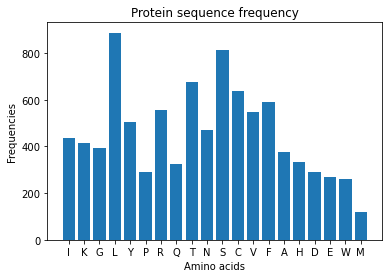

In [34]:
del common_amino['*']

pylab.bar(common_amino.keys(),common_amino.values())
pylab.title('Protein sequence frequency')
pylab.xlabel('Amino acids')
pylab.ylabel('Frequencies')

In [35]:
protein_list=[str(i) for i in protein_seq.split('*')]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [36]:
large_proteins=[i for i in protein_list if len(i)>10]
large_proteins

['QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'TALCVHQTFGCSNCTSWSCYG',
 'AGSRTRRHSVRS',
 'DTWCPCPSCGRNTSGLPQGSSS',
 'SFMHFVRTTGLY',
 'HLQWGMSKFCISLKFHNQDYSTKG',
 'NSICLSSCVTK',
 'MQPNVPFNSHEV',
 'RRCHYLWLLTPKCCC',
 'NLLSSMSQFRSRT',
 'GWSHYCLWRLCVLLCWLP',
 'PYRCCWRRFRRS',
 'NTPKRESQHQYCW',
 'RDRHYFGIFFCFHKCFCGNCERFGL',
 'TEINTESSLCICIRGCSCCTINFLPHS',
 'NCSKFCACFTEGRYNNTRWNFTVFTETH',
 'QSSCNGLHYRWCCSVDFAVAN',
 'NCRWTNCHLCKGN',
 'NICHALKGIVQKVC',
 'IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW',
 'RAYVARNQRHRKVLCPCT',
 'YDGNKQYLHTQRRCTNKGYFW',
 'HCDRSARLQECEYHF',
 'VRLCCGRCCHKNFATSI',
 'IGFTYVLFFLPSR',
 'TFGIWCHFCCSST',
 'GQSDNYYSNNC',
 'GSTSIRDGTYTSCSDY',
 'SARSSTCTIIISWYFWC',
 'PYTFFKSLCRYCSHKCLLSCL',
 'QTCFKLFGNEE',
 'WQSSSRFCHSC',
 'HHFLKERCSIYSG',
 'CCSRGCFNCCGYTY',
 'NASESFEKSANRQLYNHLPGSGFKWLHCRGGKDSA',
 'KCLLHSTIYYL',
 'EARNSWNCFLEFARNACTCRRNTQINACLCGN',
 'NSCYNATWLCNTWLKFGRSCSVYEISQSASYSFCFFT',
 'RLVLFWT

In [37]:
import pandas as pd

df=pd.DataFrame({'protein_seq':large_proteins})

In [38]:
df

,protein_seq
0,QTNQLSISCRSVL
1,TNFKICVAVTRLHA
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS
4,TALCVHQTFGCSNCTSWSCYG
5,AGSRTRRHSVRS
6,DTWCPCPSCGRNTSGLPQGSSS
7,SFMHFVRTTGLY
8,HLQWGMSKFCISLKFHNQDYSTKG
9,NSICLSSCVTK


In [39]:
df['length']=df.protein_seq.apply(len)

In [40]:
df

,protein_seq,length
0,QTNQLSISCRSVL,13
1,TNFKICVAVTRLHA,14
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
4,TALCVHQTFGCSNCTSWSCYG,21
5,AGSRTRRHSVRS,12
6,DTWCPCPSCGRNTSGLPQGSSS,22
7,SFMHFVRTTGLY,12
8,HLQWGMSKFCISLKFHNQDYSTKG,24
9,NSICLSSCVTK,11


In [41]:
df.sort_values('length',ascending=False)

,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTAHR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43


In [42]:
single_prot=df.nlargest(1,'length').iloc[0,0]
single_prot

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [121]:
with open('single_prot.fasta','w') as file:
    file.write(">large protein\n"+ single_prot)

In [43]:
#read
read=SeqIO.read('single_prot.fasta','fasta')
read

SeqRecord(seq=Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN'), id='large', name='large', description='large protein', dbxrefs=[])

### Using qblast in ncbiwww to find structures with description in Protein Data Bank(pdb)

In [44]:
result_handle=NCBIWWW.qblast('blastp','pdb',read.seq)
blast_qresult=SearchIO.read(result_handle,'blast-xml')

In [45]:
print(blast_qresult[:5])

Program: blastp (2.11.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Structure of COVID-19 RNA-dependent RNA pol...
            1      1  pdb|6YYT|A  Structure of replicating SARS-CoV-2 polymer...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|7BW4|A  Structure of the RNA-dependent RNA polymera...
            4      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...


In [46]:
seqid=blast_qresult[0]
details=seqid[0]

In [47]:
details

HSP(hit_id='pdb|7D4F|A', query_id='unnamed', 1 fragments)

In [48]:
print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

Sequence ID:pdb|7D4F|A
description:Structure of COVID-19 RNA-dependent RNA polymerase bound to suramin [Severe acute respiratory syndrome coronavirus 2]
E value:    0.0 
Bit Score:  1938.7



In [49]:
print(f'alignment:\n{details.aln}')

alignment:
Alignment with 2 rows and 926 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQA unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQG pdb|7D4F|A


In [50]:
seqid.id

'pdb|7D4F|A'

In [51]:
seqid.id.split('|')[1]

'7D4F'

In [ ]:
urllib.request.urlretrieve('https://files.rcsb.org/download/6YYT.pdb','6YYT.pdb')

In [62]:
parser=PDBParser()
structure=parser.get_structure('6YYT.pdb','6YYT.pdb')

C:\Users\oukle\Anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12059.
  PDBConstructionWarning,


In [63]:
structure[0]

<Model id=0>

In [64]:
for chain in structure[0]:
    print(chain.id)

A
B
C
D
P
Q
T
U


## protein structure

In [65]:
nv.demo() #demo

NGLWidget()

In [66]:
view=nv.show_biopython(structure)
view

NGLWidget()

### make the 2d image to be able to attach to the document files

In [67]:
view.render_image()

Image(value=b'', width='99%')

### Can represent different way from the secondary structure

In [70]:
nv.show_biopython(structure,gui=True)

NGLWidget()